In [349]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, copysign

np.set_printoptions(precision=2)

In [204]:
def logistics(x):
    return 1/(1+e**(-x))

def logistics_grad(x):
    return logistics(x)*(1-logistics(x))

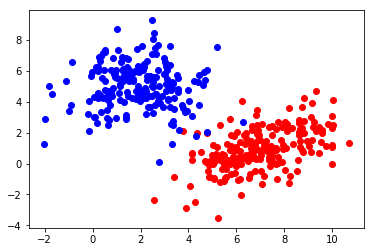

In [291]:
# create dataset
samples_a = np.random.multivariate_normal([7,1], [[2,1],[1,2]],200)
samples_a = np.concatenate((np.ones((200,1)), samples_a), axis=1)
samples_b = np.random.multivariate_normal([2,5], [[2,0],[0,2]],200)
samples_b = np.concatenate((np.ones((200,1)), samples_b), axis=1)
all_samples = np.append(samples_a, samples_b, axis=0)

# plt.plot(all_samples[:,0], all_samples[:,1], "ro")
plt.plot(samples_a[:,1], samples_a[:,2], "ro")
plt.plot(samples_b[:,1], samples_b[:,2], "bo")
plt.show()

sample form [1.   7.37 2.36] w form [ 3.    0.51 -1.  ] 
w [ 1.82 -2.19 -1.  ] @ grad [11.82 27.03] correct 193
w [-8.5  2.5 -1. ] @ grad [-0.07  0.02] correct 396
w [-7.45  2.24 -1.  ] @ grad [-0.04  0.01] correct 396
w [-6.82  2.08 -1.  ] @ grad [-0.02  0.01] correct 396
w [-6.46  2.   -1.  ] @ grad [-0.01  0.  ] correct 396


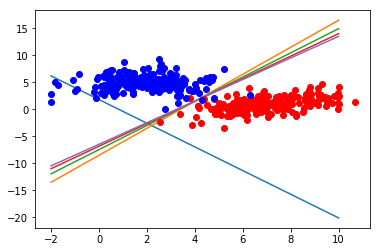

In [426]:
# train classifier

# initial values for w's
w = np.array([ 3,0.51,-1.0])
learning_rate = 0.1
iterations = 1000
no_iter = 0

print("sample form {} w form {} ".format(all_samples[0], w))

def get_class(j):
    return 0 if j >= 200 else 1

def predict(wx):
    return logistics(wx)

def grad(i,j):
    w_dot_x = w.dot( all_samples[j] )
    return -(get_class(j) - predict(w_dot_x)) * logistics_grad(w_dot_x) * all_samples[j,i]
    
def f(x):
    global w
    return w[0] + w[1]*x

while no_iter < iterations:
    tmp = np.array([1.0,1.0,-1.0])
    cum_grad = np.array([sum([grad(i,j) for j in range(400)]) for i in range(2)])
    for i in range(2):
        tmp[i] = w[i] - learning_rate*cum_grad[i]
    w = tmp
    if no_iter % (iterations/5) == 0:
        correct = 0
        for j in range(400):
            prediction = 1 if predict(w.dot( all_samples[j] )) > 0.5 else 0
            if get_class(j) == prediction:
                correct +=1
        print("w {} @ grad {} correct {}".format(w, cum_grad, correct))
        plt.plot( [-2,10], [f(-2), f(10)])
        
    no_iter += 1

plt.plot(samples_a[:,1], samples_a[:,2], "ro")
plt.plot(samples_b[:,1], samples_b[:,2], "bo")
plt.show()